Pare esse exercício serão disponibilizados três arquivos: ***amazonas.csv*** que contém dados históricos de desflorestamento nos municipios do Amazonas no ano de 2014, ***estados.csv*** que contém uma lista com o nome, uf e codigo dos estados brasileiros e ***municipios.csv*** que contém o nome de todos os municípios brasileiros e suas respectivas localizações no globo (longitude e latitude).

O objetivo do exercício é gerar um relatório sobre o desflorestamento nos municípios do Amazonas com a visualização dos dados sobre o mapa do Brasil.
Para isso será necessário relacionar ambas as três tabelas de forma que seja associado a posição geográfica (longitude e latitude) dos municípios aos dados de desflorestamento.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#biblioteca para plotar no mapa
import mplleaflet

In [2]:
# Aditional packages
import os

In [3]:
# Important directories and other constants
DATA_DIR = 'data'
AMAZONAS = 'amazonas.csv'
STATES = 'estados.csv'
CITIES = 'municipios.csv'

DESFLORESTAMENTO = 'Desflorestamento Relativo'
MINERACAO = 'Mineração'
NORM_MINING = 'Mineração Normalizada'
SCALE_FACTOR = 30 # empiric scale factor

In [4]:
#começaremos importando todas as tabelas
df_amazonas = pd.read_csv(os.path.join(DATA_DIR, AMAZONAS))
df_states = pd.read_csv(os.path.join(DATA_DIR, STATES))
df_cities = pd.read_csv(os.path.join(DATA_DIR, CITIES))

Vamos da uma olhada no jeito de cada tabela

In [5]:
df_amazonas.head()

,Municípios,Agricultura Anual,Área não Observada,Área Urbana,Desflorestamento 2014,Floresta,Hidrografia,Mineração,Mosaico de Ocupações,Não Floresta,Outros,Pasto com Solo Exposto,Pasto Limpo,Pasto Sujo,Reflorestamento,Regeneração com Pasto,Vegetação Secundária,Total Geral
0,Alvaraes,NaN,0.07,1.90,2.75,"5,415.56",133.87,NaN,101.08,43.26,5.36,NaN,2.92,1.02,NaN,5.13,198.55,"5,911.46"
1,Amatura,NaN,NaN,2.05,0.36,"4,220.22",209.41,NaN,15.87,216.55,3.76,NaN,4.03,NaN,NaN,11.44,71.74,"4,755.42"
2,Anama,NaN,0.86,0.89,0.44,"2,001.85",229.30,NaN,6.90,34.81,13.11,NaN,2.02,0.87,NaN,NaN,160.61,"2,451.66"
3,Anori,NaN,0.15,2.77,0.59,"4,646.53",436.07,NaN,17.12,636.01,4.70,NaN,8.05,0.52,NaN,NaN,41.98,"5,794.49"
4,Apui,NaN,6.71,5.91,80.19,"51,396.43",213.50,NaN,8.76,622.87,7.18,NaN,812.61,329.85,NaN,208.13,546.18,"54,238.32"


In [6]:
df_states.head()

,codigo_uf,uf,nome
0,11,RO,Rondônia
1,12,AC,Acre
2,13,AM,Amazonas
3,14,RR,Roraima
4,15,PA,Pará


In [7]:
df_cities.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31
2,5200100,Abadiânia,-16.19700,-48.7057,0,52
3,3100203,Abaeté,-19.15510,-45.4444,0,31
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15


Apos carregar os dados devemos associar as tabelas de estados e municípios e selecionar apenas os municípios do Amazonas

Note que nos dados provenientes da tabela ***municipios.csv*** o nome dos municípios estão todos acentuados, no entanto na tabela amazonas os nomes estão sem acento. Logo é necessario remover os acentos dos nomes da tabela ***municipios.csv***.

In [8]:
from unicodedata import normalize
# use esta funçao para remover acentos
def remove_acentos_python3(txt):
    return str(normalize('NFKD', txt).encode('ASCII', 'ignore'), 'utf-8')
def remove_acentos_python2(txt):
    return normalize('NFKD', txt.decode('utf-8')).encode('ASCII', 'ignore')

# ex
print(remove_acentos_python3("Olá!")) #change to python3, the one I'm using

Ola!


In [9]:
df_cities['nome'] = df_cities['nome'].apply(remove_acentos_python3)

In [10]:
df_cities.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,5200050,Abadia de Goias,-16.75730,-49.4412,0,52
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31
2,5200100,Abadiania,-16.19700,-48.7057,0,52
3,3100203,Abaete,-19.15510,-45.4444,0,31
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15


Em seguida relacione as tabelas municipios e amazonas.

In [11]:
# rename column "name", because we already have a "name" column in df_cities
df_states.rename(columns={'nome': 'estado'}, inplace=True)
df_states.head()

,codigo_uf,uf,estado
0,11,RO,Rondônia
1,12,AC,Acre
2,13,AM,Amazonas
3,14,RR,Roraima
4,15,PA,Pará


In [12]:
df_brazil = df_cities.merge(df_states, how='left', on=['codigo_uf'])

In [13]:
print('Dimensões antigas:', df_cities.shape, 'Dimensões novas:', df_brazil.shape)
df_brazil.head()

Dimensões antigas: (5570, 6) Dimensões novas: (5570, 8)


,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,uf,estado
0,5200050,Abadia de Goias,-16.75730,-49.4412,0,52,GO,Goiás
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31,MG,Minas Gerais
2,5200100,Abadiania,-16.19700,-48.7057,0,52,GO,Goiás
3,3100203,Abaete,-19.15510,-45.4444,0,31,MG,Minas Gerais
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15,PA,Pará


In [14]:
df_cities_amazonas = df_brazil[df_brazil['uf'] == 'AM']

In [15]:
print('Dimensões df_amazonas:', df_amazonas.shape, 'Dimensões df_cities_amazonas:', df_cities_amazonas.shape)

Dimensões df_amazonas: (62, 18) Dimensões df_cities_amazonas: (62, 8)


In [16]:
df_forest = df_amazonas.merge(df_cities_amazonas, left_on='Municípios', right_on='nome')
print('Dimensões dataframe Amazonas completo:', df_forest.shape)

Dimensões dataframe Amazonas completo: (62, 26)


### Questão


Plote no mapa do Brasil indicadores  de desflorestamento para todos os municipios do amazonas.
Os indicadores devem ser relativos ao tamanho da floresta de cada município dando destaque aos municipios que com desflorestamento acima da média.

#### Dica

O desflorestamento relativo é dado pelas colunas ***Desflorestamento 2014*** / ***Floresta*** da tabela ***amazonas.csv***.
Note que a coluna ***Floresta*** não é numérica e contém ',' separando os milhares, sendo necessário remover a ',' de todas as entradas e logo após converter os valores para float.

Podem ser usadas todas as dicas relevantes sobre apresentação de figuras  nos textos *Making Data Meaningful* e *Ten Simple Rules for Better Figures*.

Para plotar sobre o mapa, pode-se usar a funções normais do matplotlib e ao fim chamar a função **mplleaflet.display()**.

In [17]:
def str_to_float(number):
    return float(number.replace(',', '')) if(isinstance(number, str)) else number

def test_str_tofloat():
    tests = ['98', '7,900', '876.2', '12,986.91']
    gt = [98, 7900, 876.2, 12986.91]
    for i, n in enumerate(tests):
        if str_to_float(n) != gt[i]:
            print('FAIL! Expected: ', i, 'Got:', str_to_float(n))
            return
    print('str_to_float working!')
test_str_tofloat()
    

str_to_float working!


In [18]:
#calcula as informações do desflorestamento
df_forest['Floresta'] = df_forest['Floresta'].apply(str_to_float)
df_forest[DESFLORESTAMENTO] = df_forest['Desflorestamento 2014']/df_forest['Floresta']

In [19]:
print(list(df_forest[DESFLORESTAMENTO]))

[0.0005077960543323312, 8.530360976441986e-05, 0.00021979668806354122, 0.00012697647491784192, 0.0015602250973462553, 9.247915883070937e-06, 0.0017163941334265185, 1.8920467468286918e-05, 0.0012371568692719083, 3.685255411975891e-05, 0.00014694087073695018, 0.0009022529524217899, 0.0036821556677872776, 3.48780177659903e-05, 8.816838304986037e-05, 0.0006037122856903116, 4.185903551200976e-05, 0.00011538997457066221, 0.003536889364534527, 6.060756378666361e-05, 0.0001826542232966268, 0.0001677834754249641, 0.0010387299887621964, 9.050084980297964e-05, 0.00016196369410264162, 0.0004895391278623563, 9.15121223628259e-05, 0.0017294092214570275, 0.0011927342247981072, 9.852612953169928e-05, 0.00021525607500478349, 1.7878516768758526e-05, 9.836748025449461e-05, 2.3641817941261684e-05, 0.002081027832327975, 0.0007016895946819315, 4.533194315374329e-05, 0.000244997294579638, 0.0007155653975833208, 0.00011666658564820441, 0.0003802863087058421, 0.00019108820615122818, 0.00025481465586610157, 2.3

### Fator de Escala
Para representar as cidades no mapa com indicadores relativos ao tamanho da floresta, optou-se por representar municípios com grandes áreas de floresta por pontos maiores e municípios com pequenas áreas de florestas por pontos menores. 

Para que essa informação se adeque ao tamanho do mapa e preserve a diferença proporcional entre os municípios, aplica-se um **fator de escala** determinado empíricamente.

In [20]:
#codigo de plot
plt.figure(figsize=(8,8))

#plt.plot(df_forest['longitude'], df_forest['latitude'], 'o', s=df_forest['Floresta'])
plt.scatter(df_forest['longitude'], df_forest['latitude'],  
            s=df_forest['Floresta']/SCALE_FACTOR,
            c = df_forest[DESFLORESTAMENTO],
            cmap='bwr')

#transforma o plot em localizações no mapa
mplleaflet.display()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


### Questão


Segundo os dados, a mineração nos municípios tem alguma relação com o desflorestamento acima da média?
Mostre suas conclusões por tabelas e plots no mapa.

In [21]:
#calcula as relaçoes entre desflorestamento e mineração
print(list(df_forest[MINERACAO]))

[nan, nan, nan, nan, nan, nan, nan, 0.01, nan, nan, nan, nan, 1.9, nan, 0.01, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.39, 0.03, nan, nan, nan, nan, nan, 2.25, 0.86, nan, 16.89, nan, nan, 6.7, nan, nan, nan, 10.85, nan, nan, 1.48, 0.88, nan, nan, nan, nan, 0.14, nan, nan, nan, nan, nan, nan, 1.78, 0.03]


In [22]:
df_forest[MINERACAO].fillna(0, inplace=True)
df_forest[NORM_MINING] = (df_forest[MINERACAO] - df_forest[MINERACAO].min())/(df_forest[MINERACAO].max()-df_forest[MINERACAO].min())
df_forest.head()

,Municípios,Agricultura Anual,Área não Observada,Área Urbana,Desflorestamento 2014,Floresta,Hidrografia,Mineração,Mosaico de Ocupações,Não Floresta,...,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,uf,estado,Desflorestamento Relativo,Mineração Normalizada
0,Alvaraes,NaN,0.07,1.90,2.75,5415.56,133.87,0.0,101.08,43.26,...,1300029,Alvaraes,-3.22727,-64.8007,0,13,AM,Amazonas,0.000508,0.0
1,Amatura,NaN,NaN,2.05,0.36,4220.22,209.41,0.0,15.87,216.55,...,1300060,Amatura,-3.37455,-68.2005,0,13,AM,Amazonas,0.000085,0.0
2,Anama,NaN,0.86,0.89,0.44,2001.85,229.30,0.0,6.90,34.81,...,1300086,Anama,-3.56697,-61.3963,0,13,AM,Amazonas,0.000220,0.0
3,Anori,NaN,0.15,2.77,0.59,4646.53,436.07,0.0,17.12,636.01,...,1300102,Anori,-3.74603,-61.6575,0,13,AM,Amazonas,0.000127,0.0
4,Apui,NaN,6.71,5.91,80.19,51396.43,213.50,0.0,8.76,622.87,...,1300144,Apui,-7.19409,-59.8960,0,13,AM,Amazonas,0.001560,0.0


In [23]:
df_mining = df_forest[df_forest[MINERACAO] > 0]

In [24]:
df_mining

,Municípios,Agricultura Anual,Área não Observada,Área Urbana,Desflorestamento 2014,Floresta,Hidrografia,Mineração,Mosaico de Ocupações,Não Floresta,...,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,uf,estado,Desflorestamento Relativo,Mineração Normalizada
7,Barcelos,NaN,0.23,4.27,1.91,100948.88,"4,464.66",0.01,25.66,"16,837.56",...,1300409,Barcelos,-0.983373,-62.9311,0,13,AM,Amazonas,0.000019,0.000592
12,Boca do Acre,NaN,17.96,5.49,71.96,19542.90,143.16,1.90,47.57,61.64,...,1300706,Boca do Acre,-8.742320,-67.3919,0,13,AM,Amazonas,0.003682,0.112493
14,Caapiranga,NaN,9.68,2.89,0.76,8619.87,432.67,0.01,11.09,181.34,...,1300839,Caapiranga,-3.315370,-61.2206,0,13,AM,Amazonas,0.000088,0.000592
27,Iranduba,0.30,1.89,33.64,2.24,1295.24,322.64,0.39,99.93,132.02,...,1301852,Iranduba,-3.274790,-60.1900,0,13,AM,Amazonas,0.001729,0.023091
28,Itacoatiara,0.00,151.70,16.14,5.54,4644.79,"1,770.43",0.03,252.06,861.47,...,1301902,Itacoatiara,-3.138610,-58.4449,0,13,AM,Amazonas,0.001193,0.001776
34,Labrea,NaN,23.97,11.94,130.13,62531.60,443.40,2.25,33.18,"1,765.98",...,1302405,Labrea,-7.264130,-64.7948,0,13,AM,Amazonas,0.002081,0.133215
35,Manacapuru,NaN,15.64,14.37,3.04,4332.40,"1,459.87",0.86,102.85,798.49,...,1302504,Manacapuru,-3.290660,-60.6216,0,13,AM,Amazonas,0.000702,0.050918
37,Manaus,78.19,10.81,343.40,2.11,8612.34,"1,580.05",16.89,189.81,2.44,...,1302603,Manaus,-3.118660,-60.0212,1,13,AM,Amazonas,0.000245,1.000000
40,Maues,2.55,10.27,6.41,13.87,36472.52,"1,379.53",6.70,208.79,867.52,...,1302900,Maues,-3.392890,-57.7067,0,13,AM,Amazonas,0.000380,0.396684
44,Novo Aripuana,NaN,26.10,5.58,22.55,37840.85,766.01,10.85,23.54,"1,614.89",...,1303304,Novo Aripuana,-5.125930,-60.3732,0,13,AM,Amazonas,0.000596,0.642392


In [ ]:
# conclusoes sobre mineração e desflorestamento
abs_desforestation =  df_forest['Desflorestamento 2014']
rel_desforestation = df_forest['']
#normalized_df=(df-df.min())/(df.max()-df.min())

In [ ]:
df_mining

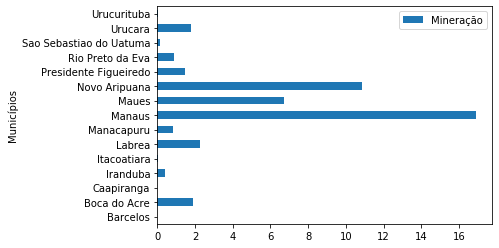

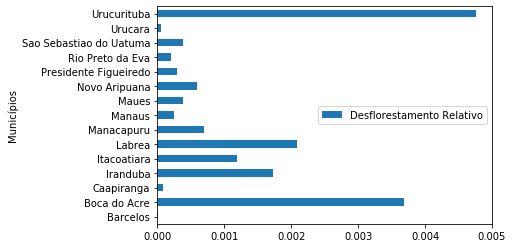

In [36]:
df_mining.plot.barh('Municípios', [MINERACAO])
df_mining.plot.barh('Municípios', DESFLORESTAMENTO)

In [ ]:
df_mining.plot.barh('Municípios', [MINERACAO])

In [ ]:
# Em relação ao todo, não há correlação

In [ ]:
df_

In [ ]:
#codigo de plot
plt.figure(figsize=(8,8))

plt.scatter(df_mining['longitude'], df_mining['latitude'],  
            s=df_mining['Floresta']/SCALE_FACTOR,
            c = df_mining[DESFLORESTAMENTO],
            cmap='bwr')

#transforma o plot em localizações no mapa
mplleaflet.display()

In [ ]:
df_not_mining = df_forest[df_forest[MINERACAO] == 0]
df_not_mining

In [ ]:
#codigo de plot
plt.figure(figsize=(8,8))

plt.scatter(df_not_mining['longitude'], df_not_mining['latitude'],  
            s=df_not_mining['Floresta']/SCALE_FACTOR,
            c = df_not_mining[DESFLORESTAMENTO],
            cmap='bwr')

#transforma o plot em localizações no mapa
mplleaflet.display()